# __LINEAR REGRESSION__

## 1. Problem Statement

__Sales__ (in thousands of units) for a particular product as a __function__ of __advertising budgets__ (in thousands of dollars) for _TV, radio, and newspaper media_. Suppose that in our role as __Data Scientist__ we are asked to suggest.

- We want to find a function that given input budgets for TV, radio and newspaper __predicts the output sales__.

- Which media __contribute__ to sales?

- Visualize the __relationship__ between the _features_ and the _response_ using scatter plots.

## 2. Data Loading and Description

The adverstising dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.
- TV        - Spend on TV Advertisements
- Radio     - Spend on radio Advertisements
- Newspaper - Spend on newspaper Advertisements
- Sales     - Sales revenue generated

__Importing Packages__

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Importing the Dataset

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

## 3. Exploratory Data Analysis

In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [6]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are 200 **observations**, and thus 200 markets in the dataset.

__Distribution of Features__

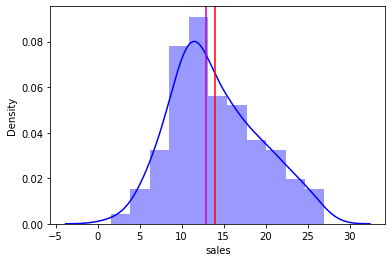

In [7]:
# Is my data normally distributed?
sns.distplot(data.sales, color='b')
plt.axvline(data.sales.mean(), color='r')
plt.axvline(data.sales.median(), color='m')
plt.show()

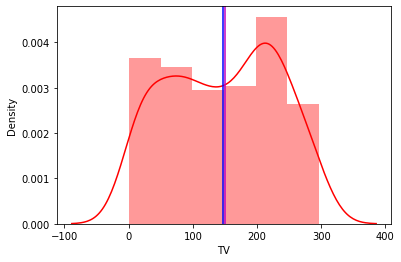

In [8]:
# Is my data normally distributed?
sns.distplot(data.TV, color='r')
plt.axvline(data.TV.mean(), color='b')
plt.axvline(data.TV.median(), color='m')
plt.show()

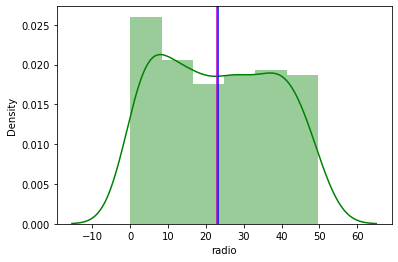

In [9]:
# Is my data normally distributed?
sns.distplot(data.radio, color='g')
plt.axvline(data.radio.mean(), color='b')
plt.axvline(data.radio.median(), color='m')
plt.show()

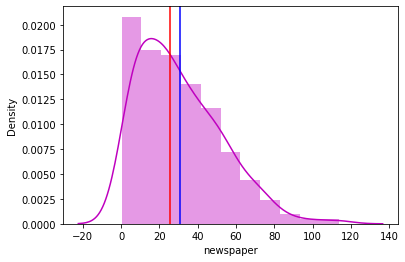

In [10]:
# Is my data normally distributed?
sns.distplot(data.newspaper, color='m')
plt.axvline(data.newspaper.mean(), color='b')
plt.axvline(data.newspaper.median(), color='r')
plt.show()

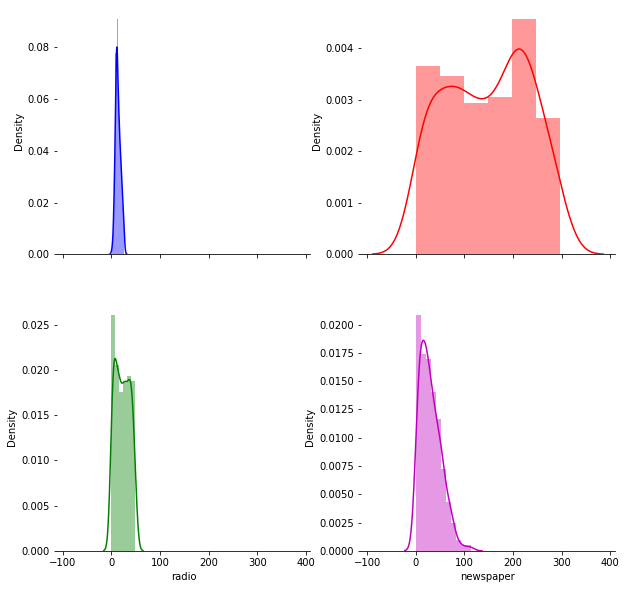

In [11]:
# Set up the matplotlib figure

f, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True)
sns.despine(left=True)

sns.distplot(data.sales, color="b", ax=axes[0, 0])
sns.distplot(data.TV, color="r", ax=axes[0, 1])
sns.distplot(data.radio, color="g", ax=axes[1, 0])
sns.distplot(data.newspaper, color="m", ax=axes[1, 1]);

__Observations__<br/>
_Sales_ seems to be __normal distribution__. Spending on _newspaper advertisement_ seems to be __right skewed__. Most of the spends on _newspaper_ is __fairly low__ where are spend on _radio and tv_ seems be __uniform distribution__. Spends on _tv_ are __comparatively higher__ then spend on _radio and newspaper_.

In [12]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Is there a relationship between sales and spend various advertising channels?

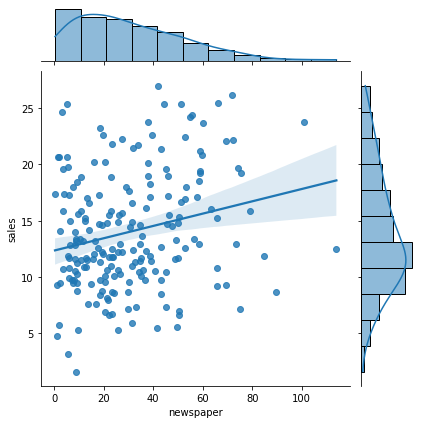

In [13]:
sns.jointplot("newspaper", "sales", data=data, kind='reg');

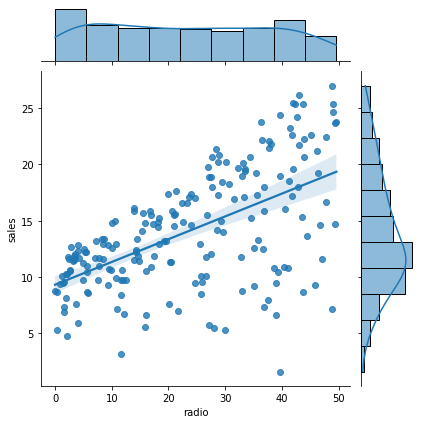

In [14]:
sns.jointplot("radio", "sales", data=data, kind='reg');

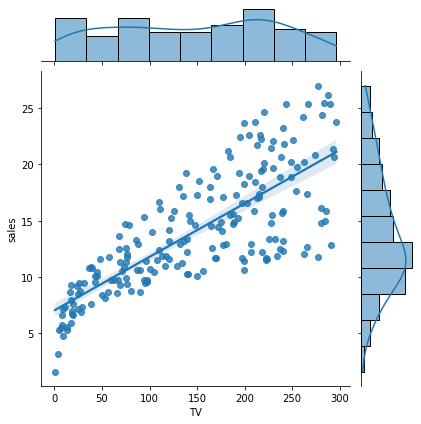

In [15]:
sns.jointplot("TV", "sales", data=data, kind='reg');

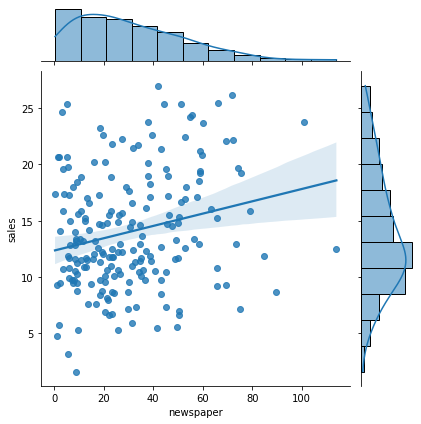

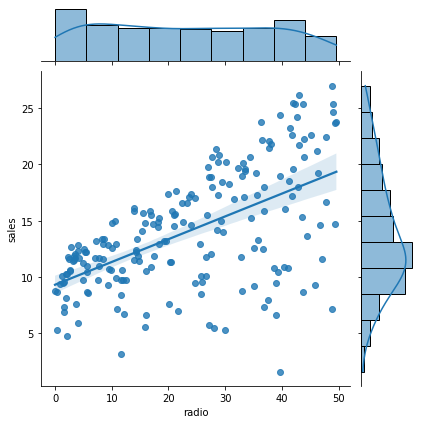

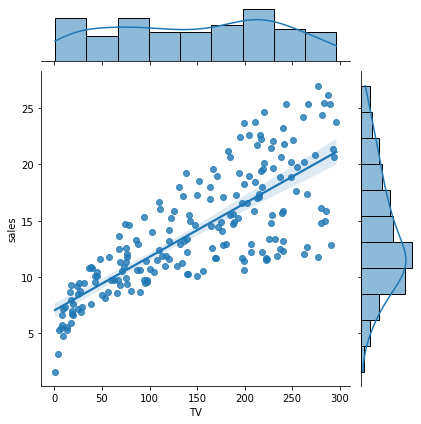

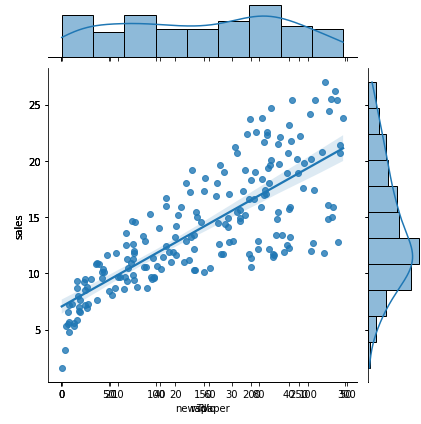

In [16]:
JG1 = sns.jointplot("newspaper", "sales", data=data, kind='reg')
JG2 = sns.jointplot("radio", "sales", data=data, kind='reg')
JG3 = sns.jointplot("TV", "sales", data=data, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A);

__Observation__<br/>
_Sales and spend on newpaper_ is __not__ highly correlated where are _sales and spend on tv_ is __highly correlated__.

In [17]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Visualising Pairwise correlation

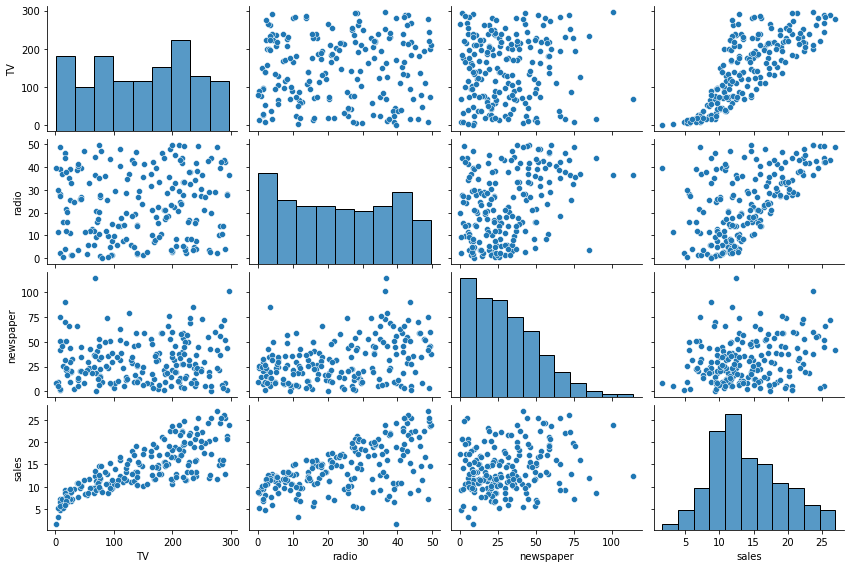

In [18]:
sns.pairplot(data, size = 2, aspect = 1.5)

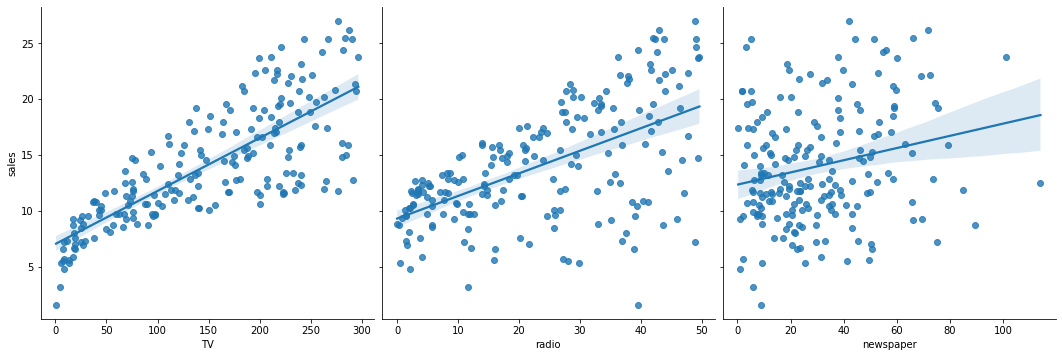

In [19]:
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=5, aspect=1, kind='reg');

__Observation__

- Strong relationship between TV ads and sales
- Weak relationship between Radio ads and sales
- Very weak to no relationship between Newspaper ads and sales



### Calculating and plotting heatmap correlation

In [20]:
x = data.corr();
x

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


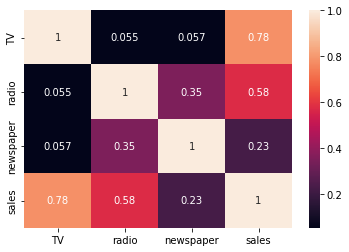

In [21]:
sns.heatmap(x, annot=True);

__Observation__

- The diagonal of the above matirx shows the auto-correlation of the variables. It is always 1. You can observe that the correlation between __TV and Sales is highest i.e. 0.78__ and then between __sales and radio i.e. 0.576__.

- correlations can vary from -1 to +1. Closer to +1 means strong positive correlation and close -1 means strong negative correlation. Closer to 0 means not very strongly correlated. variables with __strong correlations__ are mostly probably candidates for __model builing__.


<a id=section4></a>

## __4. Introduction to Linear Regression__

__Linear regression__ is a _basic_ and _commonly_ used type of __predictive analysis__.  The overall idea of regression is to examine two things: 
- Does a set of __predictor variables__ do a good job in predicting an __outcome__ (dependent) variable?  
- Which variables in particular are __significant predictors__ of the outcome variable, and in what way they do __impact__ the outcome variable?  

These regression estimates are used to explain the __relationship between one dependent variable and one or more independent variables__.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula :<br/>
$y = mx + c$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $c$ is the intercept
- $m$ is the coefficient for x

In [22]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
data.shape

(200, 4)

In [24]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [25]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

### 4.2 Preparing X and y using pandas

In [26]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [27]:
data[ ['TV', 'radio', 'newspaper'] ]

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [28]:
# create a Python list of feature names
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
# OR
# X = data[ ['TV', 'radio', 'newspaper'] ]

In [29]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [30]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [ ]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [32]:
y = data.sales
# OR
# y = data['sales']
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [33]:
y.shape

(200,)

<a id=section403></a>

### 4.3 Splitting X and y into training and test datasets.

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# default test_size=0.25

In [35]:
X_train.head()

,TV,radio,newspaper
135,36.9,38.6,65.6
67,31.5,24.6,2.2
27,142.9,29.3,12.6
114,209.6,20.6,10.7
169,215.4,23.6,57.6


In [36]:
y_train

135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
       ... 
68     13.4
193     5.9
118     9.4
48     23.2
173     7.6
Name: sales, Length: 160, dtype: float64

In [37]:
X_test.head()

,TV,radio,newspaper
19,69.2,20.5,18.3
171,50.0,11.6,18.4
108,90.4,0.3,23.2
99,289.7,42.3,51.2
178,170.2,7.8,35.2


In [39]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (160, 3)
y_train shape:  (160,)

Test cases as below
X_test shape:  (40, 3)
y_test shape:  (40,)


In [40]:
X_train.describe()

,TV,radio,newspaper
count,160.000000,160.000000,160.000000
mean,150.518125,23.388125,30.125625
std,84.957371,14.736240,21.444814
min,4.100000,0.000000,0.900000
25%,76.375000,9.525000,11.675000
50%,157.400000,24.300000,25.900000
75%,220.350000,36.350000,45.100000
max,296.400000,49.600000,100.900000


In [41]:
X_test.describe()

,TV,radio,newspaper
count,40.000000,40.000000,40.000000
mean,133.140000,22.767500,32.267500
std,89.088262,15.462832,23.270774
min,0.700000,0.300000,0.300000
25%,58.750000,10.950000,15.250000
50%,127.400000,20.250000,24.650000
75%,200.425000,36.950000,43.900000
max,289.700000,49.400000,114.000000


- __Standardization__. <br/>
Standardize features by removing the _mean_ and scaling to _unit standard deviation_.

In [42]:
# import Standard Scaler package. It will scaler the data around 0
from sklearn.preprocessing import StandardScaler

# Create object of StandardScaler()
scaler = StandardScaler()

# Now go and study i.e. fit() and give exam i.e. transform() on X_train
X_train[ ['TV', 'radio', 'newspaper'] ] = scaler.fit_transform(X_train)

# Now the entire intelligence to scale the data is stored in the variable 'scaler' i.e.
# study is already done and now we can keep on using transform() as many times as we want

X_test[ ['TV', 'radio', 'newspaper'] ] = scaler.transform(X_test)

In [43]:
X_train.head()

,TV,radio,newspaper
135,-1.341553,1.035518,1.659411
67,-1.405314,0.082496,-1.306297
27,-0.089952,0.402439,-0.819809
114,0.697613,-0.189796,-0.908687
169,0.766097,0.014423,1.285189


In [44]:
X_train.describe()

,TV,radio,newspaper
count,1.600000e+02,1.600000e+02,1.600000e+02
mean,2.081668e-17,-1.554312e-16,-1.110223e-16
std,1.003140e+00,1.003140e+00,1.003140e+00
min,-1.728842e+00,-1.592099e+00,-1.367108e+00
25%,-8.754498e-01,-9.437042e-01,-8.630784e-01
50%,8.125819e-02,6.207404e-02,-1.976652e-01
75%,8.245444e-01,8.823534e-01,7.004673e-01
max,1.722510e+00,1.784320e+00,3.310665e+00


In [45]:
X_test.head()

,TV,radio,newspaper
19,-0.960169,-0.196603,-0.553176
171,-1.186874,-0.802453,-0.548498
108,-0.709849,-1.571677,-0.323965
99,1.643399,1.287388,0.985811
178,0.232395,-1.061130,0.237368


In [46]:
y_train.head()

135    10.8
67      9.5
27     15.0
114    15.9
169    17.1
Name: sales, dtype: float64

In [47]:
y_test.head()

19     11.3
171     8.4
108     8.7
99     25.4
178    11.7
Name: sales, dtype: float64

<a id=section404></a>

### 4.4 Linear regression in scikit-learn

To apply any machine learning algorithm on your dataset, basically there are 4 steps:
1. Load the algorithm
2. Instantiate and Fit the model to the training dataset
3. Prediction on the test set
4. Calculating Root mean square error 
The code block given below shows how these steps are carried out:<br/>

``` from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(X_train, y_train) 
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))```

In [49]:
# Train the Algorithm

# import the module
from sklearn.linear_model import LinearRegression

# Create an object of LinearRegression()
regressor = LinearRegression()

# Study on (QB, AB) i.e. fit()
regressor.fit(X_train, y_train)

LinearRegression()

<a id=section405></a>

### 4.5 Interpreting Model Coefficients

In [50]:
regressor.intercept_ # beta0 or y-intercept

14.217500000000001

In [51]:
regressor.coef_ # beta1, beta2, beta3 i.e Slope/Coefficient

array([ 3.77588591,  2.88656448, -0.05946128])

In [52]:
type(regressor.coef_)

numpy.ndarray

In [53]:
feature_cols

['TV', 'radio', 'newspaper']

In [54]:
feature_cols.insert(0,'Intercept')
feature_cols

['Intercept', 'TV', 'radio', 'newspaper']

In [55]:
coef = regressor.coef_.tolist()
coef

[3.77588591114988, 2.8865644821599865, -0.05946128458314748]

In [56]:
coef.insert(0, regressor.intercept_)
coef

[14.217500000000001,
 3.77588591114988,
 2.8865644821599865,
 -0.05946128458314748]

Its hard to remember the order of the feature names, we so we are __zipping__ the features to pair the feature names with the coefficients

In [57]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 14.217500000000001
TV 3.77588591114988
radio 2.8865644821599865
newspaper -0.05946128458314748


__y = 14.217500000000001 + 3.7758859111498797 `*` TV + 2.8865644821599865 `*` radio + -0.05946128458314748 `*` newspaper__

How do we interpret the TV coefficient (_3.7758859111498797_)
- A "unit" increase in TV ad spending is **associated with** a _"3.7758859111498797_ unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 770.8 widgets.

Important Notes:
- This is a statement of __association__, not __causation__.
- If an increase in TV ad spending was associated with a __decrease__ in sales,  β1  would be __negative.__

### 4.6 Using the Model for Prediction

In [58]:
y_pred_train = regressor.predict(X_train)

In [59]:
y_pred_test = regressor.predict(X_test)

- We need an evaluation metric in order to compare our predictions with the actual values.

In [60]:
y_pred_train

array([12.04236485,  9.22699748, 15.08826616, 16.35778089, 17.07540865,
       13.36661981,  3.78817791, 12.08662048, 15.62955297,  8.68273227,
       10.61195362, 19.36739522, 18.41226024, 15.30372386, 10.00012405,
        8.19743932, 21.49425935, 14.15684188, 16.3171467 ,  8.72677043,
       15.26881361, 12.47602439, 13.7213733 , 14.20527235, 18.32820674,
       19.11937848, 20.32200442, 17.49488834,  9.34748691, 11.75581878,
       19.85996966,  9.91949478, 20.71025022, 23.06178922, 10.08383292,
       17.13980942, 19.65212394, 18.43129662, 16.91732121, 18.37653406,
       17.10374151,  8.84010201,  9.94425907,  5.38665742,  3.58633703,
       16.63361911, 12.58819659, 18.15954096, 11.77376066, 12.69588564,
       13.79647123,  7.01426813, 16.64772647,  9.79703851,  8.13501333,
       15.71731388, 24.83264798, 10.84564094, 21.15206558, 13.84768418,
       10.64154445,  8.46646573, 12.4156824 , 20.48878664, 10.50385731,
       14.51608774, 16.33763035, 17.16954682, 13.18269257, 17.34

In [61]:
X_test.shape

(40, 3)

In [62]:
y_pred_test

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [63]:
y_test

19     11.3
171     8.4
108     8.7
99     25.4
178    11.7
183     8.7
6       7.2
147    13.2
13      9.2
153    16.6
62     24.2
126    10.6
181    10.5
155    15.6
81     11.8
8      13.2
34     17.4
131     1.6
38     14.7
75     17.0
184    26.2
146    10.3
46     14.9
160    12.9
61      8.1
124    15.2
180    12.6
186    22.6
123    11.6
45      8.5
17     12.5
56     23.7
151    16.1
112    21.8
23      5.6
190     6.7
130     9.7
5      12.9
84     13.6
107     7.2
Name: sales, dtype: float64

In [64]:
X_test.head()

,TV,radio,newspaper
19,-0.960169,-0.196603,-0.553176
171,-1.186874,-0.802453,-0.548498
108,-0.709849,-1.571677,-0.323965
99,1.643399,1.287388,0.985811
178,0.232395,-1.061130,0.237368


## 5. Model evaluation 

__Error__ is the _deviation_ of the values _predicted_ by the model with the _true_ values.<br/>
For example, if a model predicts that the price of apple is Rs75/kg, but the actual price of apple is Rs100/kg, then the error in prediction will be Rs25/kg.<br/>
Below are the types of error we will be calculating for our _linear regression model_:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

### 5.1 Model Evaluation using __metrics.__

__Mean Absolute Error__ (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Computing the MAE for our Sales predictions

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [68]:
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)

In [69]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 1.2131871622729427
MAE for test set is 1.361781350209028


__Mean Squared Error__ (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Computing the MSE for our Sales predictions

In [70]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [71]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 2.406814755818906
MSE for test set is 4.402118291449684


__Root Mean Squared Error__ (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Computing the RMSE for our Sales predictions

In [72]:
RMSE_train = np.sqrt( mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

In [73]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 1.5513912323520802
RMSE for test set is 2.09812256349568


Comparing these metrics:

- __MAE__ is the easiest to understand, because it's the __average error.__ 
- __MSE__ is more popular than MAE, because MSE "punishes" larger errors.
- __RMSE__ is even more popular than MSE, because RMSE is _interpretable_ in the "y" units.
    - Easier to put in context as it's the same units as our response variable.

In [74]:
from sklearn.metrics import mean_absolute_percentage_error

In [75]:
MAPE_train = ( mean_absolute_percentage_error(y_train, y_pred_train))
MAPE_test = (mean_absolute_percentage_error(y_test, y_pred_test))

In [76]:
print('MAPE for training set is {}'.format(MAPE_train))
print('MAPE for test set is {}'.format(MAPE_test))

MAPE for training set is 0.11431218152123197
MAPE for test set is 0.24610850610005608


### 5.2 Model Evaluation using Rsquared value.

- There is one more method to evaluate linear regression model and that is by using the __Rsquared__ value.<br/>
- R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

- R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. But there is one shortcoming of Rsquare method and that is **R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting).

In [77]:
from sklearn.metrics import r2_score
r2_score_train = r2_score(y_train, y_pred_train)
r2_score_test = r2_score(y_test, y_pred_test)

In [78]:
r2_score_train

0.9067114990146383

In [79]:
r2_score_test

0.8601145185017869

In [80]:
X_train.shape

(160, 3)

In [81]:
n = X_train.shape[0]
n

160

In [82]:
X_train.head()

,TV,radio,newspaper
135,-1.341553,1.035518,1.659411
67,-1.405314,0.082496,-1.306297
27,-0.089952,0.402439,-0.819809
114,0.697613,-0.189796,-0.908687
169,0.766097,0.014423,1.285189


In [83]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [84]:
len(list(X_train.columns))

3

In [85]:
k = len(list(X_train.columns))
k

# OR
# k = X_train.shape[1]
# k

3

In [86]:
NUM = (1-r2_score_train) * (n-1)
NUM

14.832871656672507

In [87]:
DEN = n-k-1
DEN

156

In [88]:
adj_r2_score_train = 1 - (NUM/DEN)
adj_r2_score_train

0.9049174893803045

In [89]:
n = X_test.shape[0]
n

40

In [90]:
NUM = (1-r2_score_test) * (n-1)
NUM

5.455533778430311

In [91]:
DEN = n-k-1
DEN

36

In [92]:
adj_r2_score_test = 1 - (NUM/DEN)
adj_r2_score_test

0.8484573950436025

In [93]:
yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.9067114990146383 0.9049174893803045


In [94]:
yhat = regressor.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8601145185017869 0.8484573950436025
